# RL

In [5]:
import gym
import gym_maze
import time
import random
import numpy as np

X, Y = 10, 10
START = [0, 0]
GOAL = [9, 9]
EPSILON = 0.1

class RLQ:

    def __init__(self, discount_factor, learning_rate):
        self.Q = np.zeros((X, Y, 4))
        self.pi = np.zeros((X, Y), dtype=int)
        self.gama = discount_factor
        self.learning_rate = learning_rate

        self.action_reward = -0.001
        self.goal_reward = 1


    def update(self, state, next_state, action):
        if (next_state[0] == GOAL[0] and next_state[1] == GOAL[1]):
            reward = self.goal_reward
        else:
            reward = self.action_reward
        
        state_q = self.Q[state[0], state[1], action]
        self.Q[state[0], state[1], action] = (1 - self.learning_rate) * state_q + self.learning_rate * (reward + self.gama*max(self.Q[next_state[0], next_state[1]]))

        self.update_pi(state)


    def update_pi(self, state):
        # action is index_max
        action = max(range(len(self.Q[state[0], state[1]])), key=self.Q[state[0], state[1]].__getitem__)

        self.pi[state[0], state[1]] = action


    def policy(self, state):
        return self.pi[state[0], state[1]]
    

    def print_pi(self):
        direction = {0: '^', 1: 'v', 2: '>', 3: '<'}
        for i in range(X):
            for j in range(Y):
                print(direction[self.
                      pi[i, j]], end=" ")
            print()
        print()
    

    def print_q(self):
        for i in range(X):
            for j in range(Y):
                action = max(range(len(self.Q[i, j])), key=self.Q[i, j].__getitem__)
                ac = {0: '^', 1: 'v', 2: '>', 3: '<'}
                print(round(max(self.Q[i, j]), 2), end=f'{ac[action]}\t')
            print()
        print()



samples = [1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000]
data = [[] for i in range(10)]

for _ in range(10):
    # Create an environment
    env = gym.make("maze-random-10x10-plus-v0")
    observation = env.reset()

    for i, sample in enumerate(samples):
        observation = env.reset()
        state = START
        agent = RLQ(discount_factor=0.95, learning_rate=0.1)
        
        for episode in range(sample):
            rnd = random.random()
            if rnd < EPSILON:
                action = random.randint(0, 3)
            else:
                action = agent.policy(state)
            
            next_state, reward, done, truncated = env.step(action)
        
            next_state = list(reversed(next_state))
            agent.update(state=state, next_state=next_state, action=action)
            state = next_state
        
            if done or truncated:
                observation = env.reset()
                state = START
                EPSILON = 0.99 * EPSILON
                
        
        wins = 0
        for episode in range(1000):
            #env.render()
            action = agent.policy(state)
        
            next_state, reward, done, truncated = env.step(action)
            
            next_state = list(reversed(next_state))
            state = next_state
        
            if done:
                wins += 1
            if done or truncated:
                observation = env.reset()
                state = START
        data[i].append(wins)
        print(sample, wins)
    
    # Close the environment
    env.close()

data

1000 0
2000 0
5000 0
10000 0
20000 7
50000 14
100000 19
200000 7
500000 14
1000000 13
1000 0
2000 0
5000 0
10000 0
20000 0
50000 11
100000 18
200000 11
500000 16
1000000 16
1000 1
2000 0
5000 0
10000 0
20000 16
50000 27
100000 14
200000 20
500000 22
1000000 17
1000 0
2000 0
5000 0
10000 1
20000 15
50000 17
100000 15
200000 20
500000 19
1000000 24
1000 0
2000 52
5000 33
10000 13
20000 49
50000 45
100000 18
200000 31
500000 19
1000000 43
1000 45
2000 91
5000 34
10000 27
20000 20
50000 36
100000 27
200000 8
500000 20
1000000 27
1000 0
2000 0
5000 0
10000 0
20000 4
50000 24
100000 20
200000 18
500000 24
1000000 16
1000 0
2000 0
5000 1
10000 0
20000 12
50000 26
100000 27
200000 26
500000 17
1000000 35
1000 0
2000 0
5000 1
10000 25
20000 27
50000 25
100000 14
200000 15
500000 18
1000000 24
1000 1
2000 0
5000 0
10000 26
20000 35
50000 25
100000 14
200000 8
500000 11
1000000 29


[[0, 0, 1, 0, 0, 45, 0, 0, 0, 1],
 [0, 0, 0, 0, 52, 91, 0, 0, 0, 0],
 [0, 0, 0, 0, 33, 34, 0, 1, 1, 0],
 [0, 0, 0, 1, 13, 27, 0, 0, 25, 26],
 [7, 0, 16, 15, 49, 20, 4, 12, 27, 35],
 [14, 11, 27, 17, 45, 36, 24, 26, 25, 25],
 [19, 18, 14, 15, 18, 27, 20, 27, 14, 14],
 [7, 11, 20, 20, 31, 8, 18, 26, 15, 8],
 [14, 16, 22, 19, 19, 20, 24, 17, 18, 11],
 [13, 16, 17, 24, 43, 27, 16, 35, 24, 29]]

In [2]:
samples = [1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000]
data = [[0, 0, 1, 0, 0, 45, 0, 0, 0, 1],
 [0, 0, 0, 0, 52, 91, 0, 0, 0, 0],
 [0, 0, 0, 0, 33, 34, 0, 1, 1, 0],
 [0, 0, 0, 1, 13, 27, 0, 0, 25, 26],
 [7, 0, 16, 15, 49, 20, 4, 12, 27, 35],
 [14, 11, 27, 17, 45, 36, 24, 26, 25, 25],
 [19, 18, 14, 15, 18, 27, 20, 27, 14, 14],
 [7, 11, 20, 20, 31, 8, 18, 26, 15, 8],
 [14, 16, 22, 19, 19, 20, 24, 17, 18, 11],
 [13, 16, 17, 24, 43, 27, 16, 35, 24, 29]]

from statistics import mean
data2 = []
for i in data:
    data2.append(mean(i))
data2

[4.7, 14.3, 6.9, 9.2, 18.5, 25, 18.6, 16.4, 18, 24.4]

/tmp/ipykernel_3573/2123658505.py:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("plot.png")
/tmp/ipykernel_3573/2123658505.py:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("plot.png")
/tmp/ipykernel_3573/2123658505.py:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("plot.png")
/tmp/ipykernel_3573/2123658505.py:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inches_restore" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("plot.png")


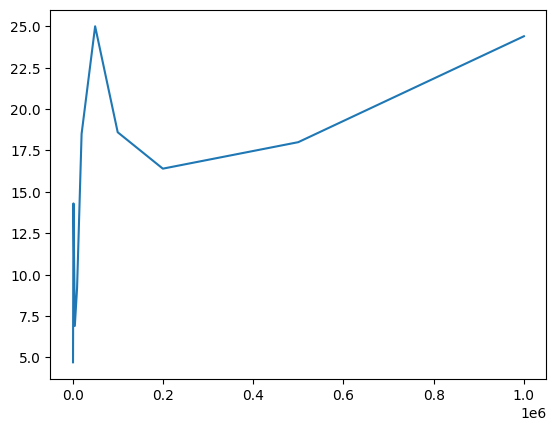

In [5]:
from matplotlib import pyplot as plt
plt.plot(samples, data2)
plt.show()
#plt.savefig("plot.png")